In [168]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2
from skimage.io import imread_collection
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from skimage import color
sns.set()

# Grayscale plot of single image

In [4]:
path = '/Users/arpit/Desktop/GAN/Generated_Paintings/1.png'
# read the image as grayscale from the outset
image = skimage.io.imread(fname=path, as_gray=True)
# display the image
viewer_gray = skimage.viewer.ImageViewer(image)
#viewer_gray.show()

In [5]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

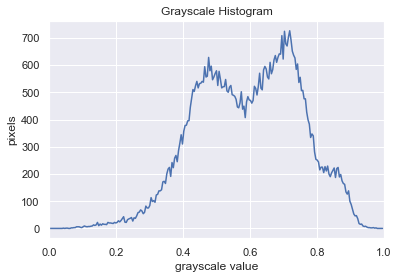

In [6]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

# RGB Plot fo single image

In [7]:
# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=path)

# display the image
viewer_color = skimage.viewer.ImageViewer(image)
viewer_color.show()

[]

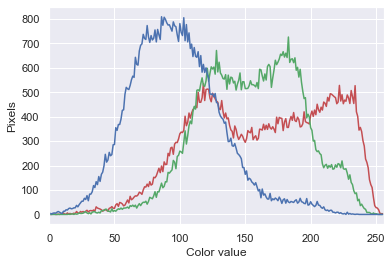

In [8]:
# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

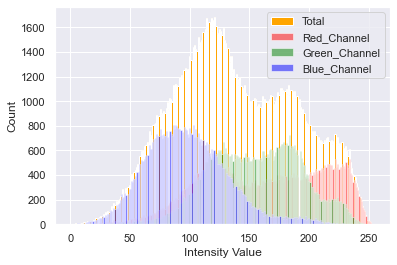

In [9]:
#RGB WITH TOTAL PLOT
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

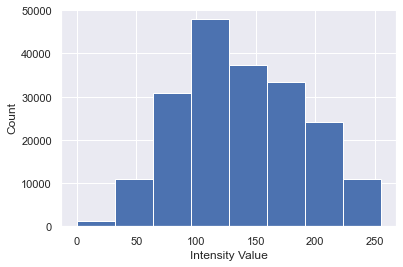

In [10]:
# Histogram plot
_ = plt.hist(image.ravel(), bins = 8 )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.show()

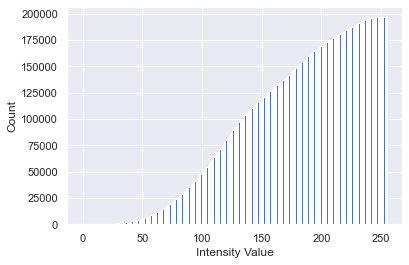

In [11]:
# Cumulative Histogram
_ = plt.hist(image.ravel(), bins = 256, cumulative = True)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
plt.show()

In [12]:
show_grayscale_equalized(image)

NameError: name 'show_grayscale_equalized' is not defined

In [ ]:
#RGB WITH TOTAL PLOT
_ = plt.hist(show_grayscale_equalized(image).ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image.ravel(), bins = 256, color = 'gray', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Gray_Scale'])
plt.show()

In [13]:
#RGB WITH TOTAL PLOT
_ = plt.hist(show_rgb_equalized(image).ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

NameError: name 'show_rgb_equalized' is not defined

# 17.02.2021 (Continue)

[[182.2383651  179.35522926 124.99158509]
 [ 76.3204962   87.10794297  46.97148676]
 [148.41165276 147.01427317  93.78341385]
 [222.07986406 214.03653356 156.86094591]
 [219.34035279 177.09441293  91.76066516]
 [114.59291085 120.4981203   74.20173201]]


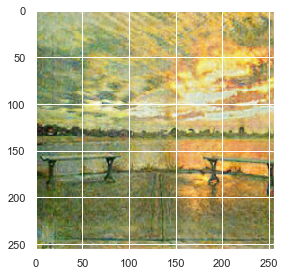

In [14]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans

original = io.imread('/Users/arpit/Desktop/GAN/Generated_Paintings/1.png')
n_colors = 6

arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print(centers)
less_colors = centers[labels].reshape(original.shape).astype('uint8')


io.imshow(original)


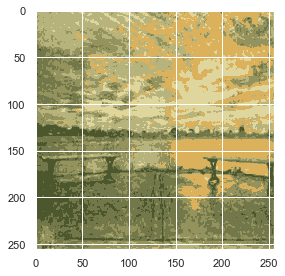

In [15]:
io.imshow(less_colors)

In [16]:
def rgb_plot(image):
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.show()

In [17]:
def color_quantization(original):
    #original = io.imread(path)
    n_colors = 256
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors

In [18]:
col = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [19]:
len(col)

751

In [20]:
temp = []
for i in col:
     temp.append(color_quantization(i))

KeyboardInterrupt: 

In [21]:
len(temp)

0

In [22]:
temp[0]

IndexError: list index out of range

In [23]:
io.imshow(temp[0])

IndexError: list index out of range

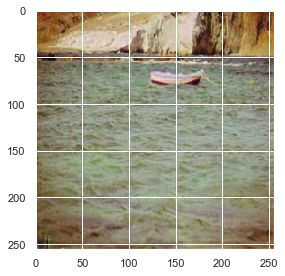

In [24]:
io.imshow(col[0])

In [25]:
rgb_plot(temp[2])

IndexError: list index out of range

In [26]:
labels

array([3, 0, 0, ..., 2, 2, 2], dtype=int32)

In [27]:
temp[0]

IndexError: list index out of range

In [28]:
centers

array([[182.2383651 , 179.35522926, 124.99158509],
       [ 76.3204962 ,  87.10794297,  46.97148676],
       [148.41165276, 147.01427317,  93.78341385],
       [222.07986406, 214.03653356, 156.86094591],
       [219.34035279, 177.09441293,  91.76066516],
       [114.59291085, 120.4981203 ,  74.20173201]])

In [29]:
(set(temp[0].flatten()))

IndexError: list index out of range

In [30]:
img = temp[0]

IndexError: list index out of range

In [31]:
img = img.reshape(-1, img.shape[2])

NameError: name 'img' is not defined

In [32]:
print (img.shape)

NameError: name 'img' is not defined

In [33]:
counter = np.unique(img, axis=0)
# n unique colors (3 values per pixel)
print (counter.shape)

NameError: name 'img' is not defined

In [34]:
counter

NameError: name 'counter' is not defined

In [35]:
un = []
for img in temp:
    img = img.reshape(-1, img.shape[2])
    counter = np.unique(img, axis=0)
    un.append(counter)

In [36]:
unique_colors = np.unique(un, axis=0)

In [37]:
unique_colors

array([], dtype=float64)

In [38]:
flat_list = [item for sublist in unique_colors for item in sublist]

In [39]:
len(flat_list)

0

In [40]:
flat_list[1]

IndexError: list index out of range

In [41]:
unique_list = np.unique(flat_list,axis=0)

In [42]:
len(unique_list)

0

In [43]:
unique_list 

array([], dtype=float64)

In [44]:
np.unique(temp[0],axis=)

SyntaxError: invalid syntax (<ipython-input-44-992054604295>, line 1)

In [45]:
flat_list = [item for sublist in temp[0] for item in sublist]

IndexError: list index out of range

In [46]:
np.unique(flat_list,axis=0)

array([], dtype=float64)

# 19.02.2021 (For Single Image)

In [47]:
def flat_list(unique_colors):
    flat_list = [item for sublist in unique_colors for item in sublist]
    return flat_list

In [48]:
single_quant = color_quantization(col[0])

In [49]:
flat_single = flat_list(single_quant)

In [50]:
np.unique(flat_single,axis=0)

array([[ 14,  10,  15],
       [ 31,  18,  16],
       [ 44,  26,  18],
       [ 44,  36,  36],
       [ 56,  31,  19],
       [ 58,  42,  28],
       [ 61,  49,  44],
       [ 69,  38,  22],
       [ 73,  57,  28],
       [ 73,  59,  55],
       [ 77,  47,  35],
       [ 80,  42,  20],
       [ 82,  65,  37],
       [ 86,  70,  69],
       [ 87,  51,  29],
       [ 87,  70,  51],
       [ 92,  64,  28],
       [ 93,  55,  40],
       [ 93,  79,  43],
       [ 93,  79,  77],
       [ 93,  82,  56],
       [ 94,  49,  18],
       [ 94,  68,  39],
       [ 98,  90,  85],
       [ 99,  89,  64],
       [100,  56,  29],
       [100,  97,  69],
       [101,  70,  49],
       [103,  69,  39],
       [103,  91,  52],
       [104, 106,  82],
       [105,  86,  36],
       [106,  78,  46],
       [106, 109,  92],
       [107,  85,  71],
       [107,  98,  92],
       [107, 111,  69],
       [108,  81,  55],
       [108,  90,  85],
       [109,  97,  74],
       [110, 118,  85],
       [111,  98

In [51]:
#Unique values in original image
len(np.unique(flat_list(col[0]),axis =0))

46801

In [52]:
#Unique values after quantisation 
len(np.unique(flat_single,axis=0))

256

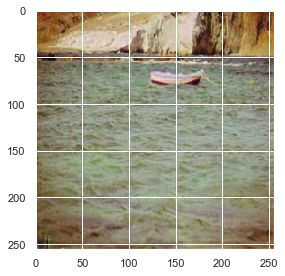

In [53]:
#Original Image
io.imshow(col[0])

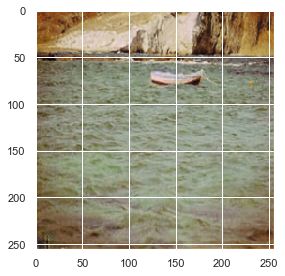

In [54]:
#After Quantisation 
io.imshow(single_quant)

In [55]:
#Quantisaton of single image
len_quant = np.unique(flat_single,axis=0)

In [56]:
#Length
len(len_quant)

256

In [57]:
# First Image
flat_single[0]

array([133,  87,  22], dtype=uint8)

In [58]:
#flat image
flat = pd.DataFrame(flat_single, columns=list('RGB'))

NameError: name 'pd' is not defined

In [ ]:
#RGB values
flat

In [ ]:
#Unique RGB values
unique_rgb =np.unique(flat, axis =0)

In [ ]:
#Printing values
unique_rgb

In [ ]:
#Createing linear space according to unique rgb values
labels = np.linspace(0,1,len(unique_rgb))

In [ ]:
#Labels (LinearSpace)
labels

In [ ]:
#Copy
unique_df = unique_rgb.copy()

In [ ]:
#Converting to dataframe
unique_df = pd.DataFrame(unique_df, columns = list('RGB'))

In [ ]:
#Assigning labels to each uniqye values
unique_df['LinearSpace']=labels

In [ ]:
#Printing
unique_df

In [ ]:
#Quantisation image values
flat

In [ ]:
#Assigning LinearSPace values to quantised image based on unique values
new_labels = []
count = 0
for i in range(len(flat)):
    for j in range(len(unique_df)):
        if (flat[['R','G','B']].values[i] == unique_df[['R','G','B']].values[j]).all():
            new_labels.append(unique_df['LinearSpace'][j])
            print(count)
            count += 1

In [ ]:
#Length of new labels 
len(new_labels)

In [ ]:
#adding to dataframe
flat['LinearSpace'] = new_labels

In [ ]:
#RGB with LinearSpace
flat.head()

# SUNDAY UPDATE

In [60]:
original_painting = '/Users/arpit/Desktop/GAN/monet2photo/trainA/00225.jpg'

In [61]:
image_1 = io.imread(original_painting)

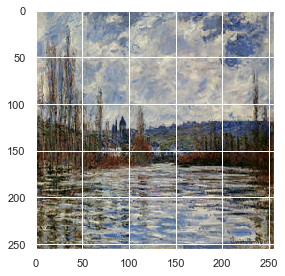

In [62]:
io.imshow(image_1)

In [63]:
image_1.shape

(256, 256, 3)

In [64]:
len(np.unique(flat_list(image_1), axis=0))

36210

In [65]:
generated_painting = '/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Train/82.png'

In [66]:
image_2 = io.imread(generated_painting)

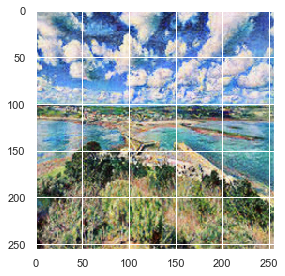

In [67]:
io.imshow(image_2)

In [68]:
image_2.shape

(256, 256, 3)

In [69]:
len(np.unique(flat_list(image_2), axis=0))

63944

In [70]:
image_1 = color_quantization(image_1)

In [71]:
image_2 = color_quantization(image_2)

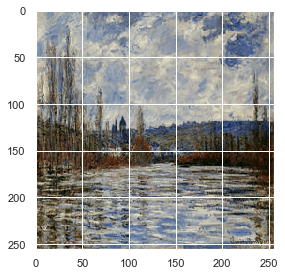

In [72]:
io.imshow(image_1)

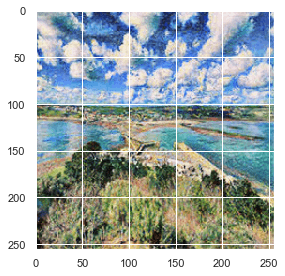

In [73]:
io.imshow(image_2)

In [74]:
len(np.unique(flat_list(image_1), axis=0))

256

In [75]:
len(np.unique(flat_list(image_2), axis=0))

256

In [76]:
linear_space = np.linspace(0,1,len(np.unique(flat_list(image_1), axis=0)))

In [77]:
linear_space

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [78]:
flat_1 = flat_list(image_1)
flat_2 = flat_list(image_2)

In [79]:
df1 = pd.DataFrame(flat_1, columns=list('RGB'))

In [80]:
df2 = pd.DataFrame(flat_2, columns=list('RGB'))

## For original painting

In [81]:
df1.head()

,R,G,B
0,165,156,131
1,167,158,143
2,167,158,143
3,168,167,148
4,174,164,154


In [82]:
unique_flat1 = np.unique(flat_1, axis =0)

In [83]:
unique_flat1 = pd.DataFrame(unique_flat1, columns=list('RGB'))

In [84]:
unique_flat1['LinearSpace'] = linear_space

In [85]:
unique_flat1.head()

,R,G,B,LinearSpace
0,5,8,0,0.000000
1,12,16,4,0.003922
2,13,18,22,0.007843
3,17,28,43,0.011765
4,20,23,10,0.015686


In [86]:
len(df1)

65536

In [87]:
df1.head()

,R,G,B
0,165,156,131
1,167,158,143
2,167,158,143
3,168,167,148
4,174,164,154


In [88]:
df1 = pd.merge(df1, unique_flat1 , how ='left')

In [89]:
df1.head()

,R,G,B,LinearSpace
0,165,156,131,0.807843
1,167,158,143,0.819608
2,167,158,143,0.819608
3,168,167,148,0.823529
4,174,164,154,0.858824


In [90]:
df1

,R,G,B,LinearSpace
0,165,156,131,0.807843
1,167,158,143,0.819608
2,167,158,143,0.819608
3,168,167,148,0.823529
4,174,164,154,0.858824
...,...,...,...,...
65531,130,99,68,0.596078
65532,77,39,21,0.262745
65533,89,50,29,0.337255
65534,100,63,35,0.407843


## For Generated Painting

In [91]:
df2.head()

,R,G,B
0,200,196,207
1,187,182,187
2,173,189,182
3,163,183,168
4,161,163,160


In [92]:
df2

,R,G,B
0,200,196,207
1,187,182,187
2,173,189,182
3,163,183,168
4,161,163,160
...,...,...,...
65531,180,150,113
65532,188,166,133
65533,188,166,133
65534,188,166,133


## KNN 

In [93]:
df1.head()

,R,G,B,LinearSpace
0,165,156,131,0.807843
1,167,158,143,0.819608
2,167,158,143,0.819608
3,168,167,148,0.823529
4,174,164,154,0.858824


In [94]:
df1

,R,G,B,LinearSpace
0,165,156,131,0.807843
1,167,158,143,0.819608
2,167,158,143,0.819608
3,168,167,148,0.823529
4,174,164,154,0.858824
...,...,...,...,...
65531,130,99,68,0.596078
65532,77,39,21,0.262745
65533,89,50,29,0.337255
65534,100,63,35,0.407843


In [95]:
X = df1[['R','G','B']]
X.head()

,R,G,B
0,165,156,131
1,167,158,143
2,167,158,143
3,168,167,148
4,174,164,154


In [96]:
y = df1['LinearSpace']
y.head()

0    0.807843
1    0.819608
2    0.819608
3    0.823529
4    0.858824
Name: LinearSpace, dtype: float64

In [97]:
y = y.astype(str)

In [98]:
y.head()

0     0.807843137254902
1    0.8196078431372549
2    0.8196078431372549
3    0.8235294117647058
4    0.8588235294117647
Name: LinearSpace, dtype: object

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
knn = KNeighborsClassifier(n_neighbors=256, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=256)

In [101]:
y_pred = knn.predict(X_test)

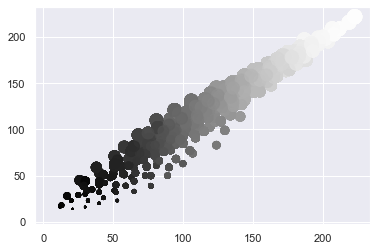

In [102]:
plt.scatter(
    X_test['R'],
    X_test['G'],
    X_test['B'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [103]:
cf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

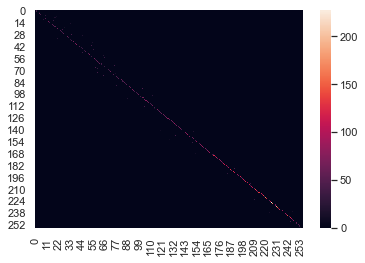

In [104]:
sns.heatmap(cf_matrix)

In [105]:
df2

,R,G,B
0,200,196,207
1,187,182,187
2,173,189,182
3,163,183,168
4,161,163,160
...,...,...,...
65531,180,150,113
65532,188,166,133
65533,188,166,133
65534,188,166,133


In [106]:
predicted_new = knn.predict(df2)

In [107]:
df2['LinearSpace'] = predicted_new

In [108]:
df2.head()

,R,G,B,LinearSpace
0,200,196,207,0.9647058823529412
1,187,182,187,0.9176470588235294
2,173,189,182,0.8941176470588235
3,163,183,168,0.8156862745098039
4,161,163,160,0.803921568627451


In [109]:
df1['LinearSpace'] = df1['LinearSpace'].astype(str)

In [110]:
df3 = pd.merge(df2,df1, how = 'left', on='LinearSpace')

In [111]:
df3.drop_duplicates(inplace = True)

In [112]:
df3.drop(['LinearSpace'], axis =1 , inplace=True)

In [113]:
df3.reset_index(drop=True)

,R_x,G_x,B_x,R_y,G_y,B_y
0,200,196,207,197,199,194
1,187,182,187,186,187,182
2,173,189,182,180,184,182
3,163,183,168,166,173,172
4,161,163,160,163,166,160
...,...,...,...,...,...,...
251,73,156,158,106,127,160
252,54,39,28,52,40,33
253,36,24,17,30,30,15
254,157,155,70,142,127,99


# Monday

### Loading Dataset 

#### Load all the images -> Training Testing (Original) and Training Testing (Generated )

In [140]:
# Original Dataset 

## Training Dataset
orig_paintTrain = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/trainA/*.jpg')
orig_naturalTrain = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/trainB/*.jpg')

## Testing Dataset
orig_paintTest = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg')
orig_naturalTest = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testB/*.jpg')

In [141]:
# Generated Dataset 

## Training Dataset
gen_paintTrain = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Train/*.png')
gen_naturalTrain = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Natural_Fake_Train/*.png')

## Testing Dataset
gen_paintTest = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')
gen_naturalTest = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Natural_Fake_Test/*.png')

#### Saving K means for every image in dictionary

In [148]:
# K-Means function
def color_quantization(original):
    n_colors = 256
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors

In [162]:
# Quantisation for Original_Painting_Test
quant_gptr = []
for i in tqdm(orig_paintTest):
    quant_gptr.append(color_quantization(i))

100%|██████████| 121/121 [52:44<00:00, 26.15s/it]


In [163]:
len(quant_gptr)

121

In [166]:
len(np.unique(quant_gptr[0], axis = 0))

256

In [206]:
# For providing Labels
def rgb2gray(rgb):
    r, g, b = rgb[0], rgb[1], rgb[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

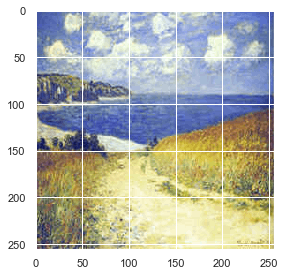

In [175]:
io.imshow(quant_gptr[0])

In [182]:
#List of single image 
flat_quant = flat_list(quant_gptr[0])

In [185]:
#Length
len(flat_quant)

65536

In [183]:
#Calculating unique values form it
unique_quant = np.unique(flat_quant, axis = 0)

In [184]:
#Length
len(unique_quant)

256

In [187]:
#Performing the steps for whole dataset (Original Paintings Test Dataset)
flat_large = []
for i in tqdm(quant_gptr):
    flat_large.append(flat_list(i))

100%|██████████| 121/121 [00:01<00:00, 108.69it/s]


In [191]:
#Again converting to flat list
flat_large = flat_list(flat_large)

In [197]:
#Length of all RGB
len(flat_large)

7929856

In [194]:
#Finding unique values from list
unique_quant = np.unique(flat_large, axis = 0)

In [195]:
#Length of Unique values
len(unique_quant)

30684

In [207]:
#Linearspace to full values
linear_full = []
for i in tqdm(flat_large):
    linear_full.append(rgb2gray(i))

100%|██████████| 7929856/7929856 [00:50<00:00, 157194.09it/s]


In [210]:
#Checking size
len(linear_full)

7929856

In [209]:
#Linearspace to unique values
linear_unique = []
for i in tqdm(unique_quant):
    linear_unique.append(rgb2gray(i))

100%|██████████| 30684/30684 [00:00<00:00, 152715.25it/s]


In [211]:
#Checking size
len(linear_unique)

30684

In [221]:
#Printing unique colors from Painting dataset 
linear_unique

[2.183,
 1.402,
 1.761,
 4.172,
 7.529,
 11.245000000000001,
 9.016,
 14.277000000000001,
 13.154,
 13.204999999999998,
 1.3418999999999999,
 1.7008999999999999,
 3.8669000000000002,
 4.6189,
 6.2149,
 5.108899999999999,
 5.906899999999999,
 7.5028999999999995,
 7.633899999999999,
 8.3179,
 10.027899999999999,
 6.396899999999999,
 7.878899999999999,
 8.1579,
 10.6829,
 16.0919,
 13.942899999999998,
 12.266899999999998,
 17.7729,
 21.1929,
 19.7959,
 33.2069,
 1.5268000000000002,
 3.1568,
 6.348800000000001,
 3.8747999999999996,
 5.7328,
 9.8368,
 8.9588,
 6.809799999999999,
 6.9238,
 9.2038,
 15.4108,
 17.3488,
 12.8058,
 10.3148,
 13.2958,
 13.996799999999999,
 13.802799999999998,
 16.994799999999998,
 19.7818,
 20.174799999999998,
 17.244799999999998,
 44.3458,
 0.8967,
 1.5977000000000001,
 2.2987,
 4.3507,
 2.8857000000000004,
 3.4557,
 4.4986999999999995,
 4.173699999999999,
 4.9887,
 8.0837,
 10.4777,
 7.108699999999999,
 8.3967,
 11.8507,
 22.6737,
 19.3847,
 22.935699999999997,

In [223]:
# Creating DataFrame
unique_wholeDataset = pd.DataFrame(list(zip(unique_quant,linear_unique)), columns=['RGB','LinearSpace'])

In [225]:
#Whole Dataset
unique_wholeDataset.head()

,RGB,LinearSpace
0,"[0, 1, 14]",2.183
1,"[0, 2, 2]",1.402
2,"[0, 3, 0]",1.761
3,"[0, 4, 16]",4.172
4,"[0, 7, 30]",7.529


In [228]:
#length
len(unique_wholeDataset)

30684

In [236]:
#full Dataset
fullDataset = pd.DataFrame(list(zip(flat_large,linear_full)), columns=['RGB','LinearSpace'])

In [237]:
#Printing
fullDataset.head()

,RGB,LinearSpace
0,"[50, 67, 139]",70.1200
1,"[61, 79, 149]",81.5919
2,"[61, 79, 149]",81.5919
3,"[69, 88, 161]",90.6341
4,"[76, 95, 168]",97.6334


In [288]:
quant_gptr[0].shape

(256, 256, 3)

In [289]:
len(flat_list(quant_gptr[0]))

65536

Text(0, 0.5, 'Frequency')

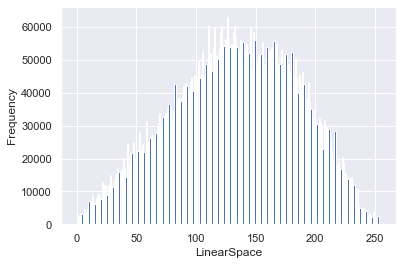

In [293]:
plt.hist(fullDataset['LinearSpace'], bins=range(256))
plt.xlabel("LinearSpace")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

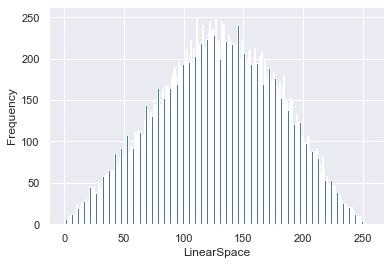

In [294]:
plt.hist(unique_wholeDataset['LinearSpace'], bins=range(256))
plt.xlabel("LinearSpace")
plt.ylabel('Frequency')